In [1]:
# import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import itertools
import seaborn as sb
import pickle

In [2]:
# import the datasets
df_train=pd.read_csv('train.csv')

In [3]:
df_train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
# convert label real to 0 and fake to 1
convert_dic={0:'Real', 1:'Fake'}
df_train['label']=df_train['label'].replace(convert_dic)
df_train.label.value_counts()
# this value counts of label shows that dataset is balanced so we don't need under and over sampling to balanced the datasets

Fake    10413
Real    10387
Name: label, dtype: int64

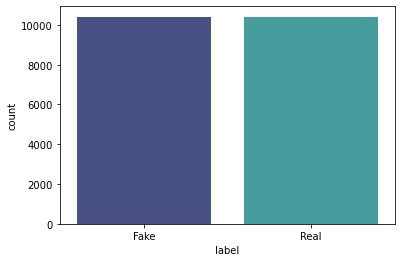

In [5]:
# visualize the above distribution of label
def create_distribution(datafile):
    return sb.countplot(x='label', data=df_train, palette='mako')
create_distribution(df_train)

In [6]:
df_train.shape

(20800, 5)

In [7]:
# Now missing values check (data integrity ckeck)
def data_quality_check():
    print("Checking data qualities....")
    df_train.isnull().sum()
    df_train.info()
    print("check_finished.")
data_quality_check()

Checking data qualities....
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  object
dtypes: int64(1), object(4)
memory usage: 812.6+ KB
check_finished.


In [8]:
df_train['text']

0        House Dem Aide: We Didn’t Even See Comey’s Let...
1        Ever get the feeling your life circles the rou...
2        Why the Truth Might Get You Fired October 29, ...
3        Videos 15 Civilians Killed In Single US Airstr...
4        Print \nAn Iranian woman has been sentenced to...
                               ...                        
20795    Rapper T. I. unloaded on black celebrities who...
20796    When the Green Bay Packers lost to the Washing...
20797    The Macy’s of today grew from the union of sev...
20798    NATO, Russia To Hold Parallel Exercises In Bal...
20799      David Swanson is an author, activist, journa...
Name: text, Length: 20800, dtype: object

In [9]:
df_train.isnull().any()

id        False
title      True
author     True
text       True
label     False
dtype: bool

In [10]:
#filling the missing values
df=df_train.fillna(' ')

In [11]:
# Now check the missing values in the datasets
df.isnull().any()

id        False
title     False
author    False
text      False
label     False
dtype: bool

In [12]:
#split the datasets
x_train, x_test, y_train, y_test=train_test_split(df['text'], df['label'], test_size=0.30, random_state=63)

In [13]:
x_train.head(10)

11175    BEIJING  —   They protest, picket and sing to ...
3397     0 Our Landfill Economy: Want to make a quick p...
11828    (AP) WASHINGTON  —   The United States has con...
11051    After a swelling tide of protests, the preside...
20355    Interesting juxtaposition of the week: The AE ...
15379    BERLIN  —   One of the most powerful people in...
4365     Getty - Saul Loeb The Wildfire is an opinion p...
2801     In 2012, Forbes dropped J. K. Rowling after ei...
1750     Monday on his nationally syndicated radio prog...
18295    \nIt might seem strange for a parent to give t...
Name: text, dtype: object

In [14]:
# it is very important to extract the features, so to get the uniform set of attributes we need to reduce
# the unnstructured data so that the algorithm can understand it. 
# We have to create on bag of words count

In [15]:
vectorizer=TfidfVectorizer(stop_words='english', max_df=0.75)
xv_train=vectorizer.fit_transform(x_train)
xv_test=vectorizer.transform(x_test)

In [16]:
# Now build a classifier
# Next, we’ll initialize a PassiveAggressiveClassifier. This is. We’ll fit this on tfidf_train and y_train.
# Then, we’ll predict on the test set from the TfidfVectorizer and calculate the accuracy with accuracy_score().
pass_aggClassifier=PassiveAggressiveClassifier(max_iter=50)
pass_aggClassifier.fit(xv_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

In [17]:
y_pred=pass_aggClassifier.predict(xv_test)

In [18]:
# check the accuracy for this classifier
acc_score=accuracy_score(y_test, y_pred)

In [19]:
acc_score

0.9591346153846154

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Fake       0.96      0.96      0.96      3120
        Real       0.96      0.96      0.96      3120

    accuracy                           0.96      6240
   macro avg       0.96      0.96      0.96      6240
weighted avg       0.96      0.96      0.96      6240



In [21]:
confusion_matrix(y_test, y_pred)

array([[3004,  116],
       [ 139, 2981]], dtype=int64)

In [22]:
pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')),
                     ('nbmodel', MultinomialNB())])

In [23]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('nbmodel', MultinomialNB())])

In [24]:
y1_pred=pipeline.predict(x_test)

In [25]:
confusion_matrix(y_test, y1_pred)

array([[2317,  803],
       [  39, 3081]], dtype=int64)

In [26]:
from sklearn.metrics import accuracy_score
print(classification_report(y_test, y1_pred))

              precision    recall  f1-score   support

        Fake       0.98      0.74      0.85      3120
        Real       0.79      0.99      0.88      3120

    accuracy                           0.87      6240
   macro avg       0.89      0.87      0.86      6240
weighted avg       0.89      0.87      0.86      6240



In [27]:
y_pred1=pipeline.predict(x_test)
score=accuracy_score(y_test,y_pred1)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 86.51%


In [28]:
print('Accuracy score :', accuracy_score(y_test, y_pred1)*100)
# We got an accuracy of 86.51% with this model. 

Accuracy score : 86.50641025641026


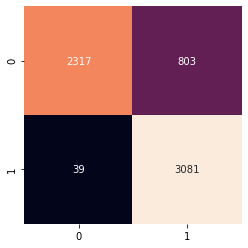

In [29]:
# Finally, let’s print out a confusion matrix to gain insight into the number of false and true negatives and positives
import matplotlib.pyplot as plt
cm=metrics.confusion_matrix(y_test, y1_pred, labels=['Fake', 'Real'])
sns.heatmap(cm, square = True, annot = True, fmt = 'd', 
            cbar=False)

In [30]:
# So with this model, we have 3081  true positives, 2317 true negatives, 803 false positives, and 39 false negatives.

In [31]:
TN, FP, FN, TP=confusion_matrix(y_test, y_pred1).ravel()
print("True Negatives :", TN)
print("False Positives :", FP)
print("False Negatives :", FN)
print("True Positives :", TP)

True Negatives : 2317
False Positives : 803
False Negatives : 39
True Positives : 3081


In [32]:
# Now calculate the specificity and sensitivity
Specificity =TN/(TN+FP)
Specificity

0.7426282051282052

In [33]:
Sensitivity =TP/(TP+FN)
Sensitivity

0.9875